<a href="https://colab.research.google.com/github/amifra8uni/LabCMP/blob/main/bethebloch_Rahatlou_05_06_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bethe-Bloch with Numpy (python) (50 pt)
The average energy lost by a charged particle with charge $z_p$ going through a material with charge Z and mass number A is given by the Bethe-Bloch formula

$ -\frac{1}{\rho} \frac{dE}{dx}=C\frac{z_p^2}{\beta^2}\frac{Z}{A}\left(\ln\frac{2m_e\beta^2\gamma^2}{\bar{I}}-\beta^2 \right)$

(for semplicity we will ignore the density correction), where $\beta$ and $\gamma$ are the Lorentz parameters of the cherged particle,

$m_e = 0,5 MeV$ e $\bar{I}\approx 10Z (\textrm{in eV})$ is the average ionisation energy of the material and $\rho$ its density, and $C = 0,3 \textrm{MeV/g/cm}^{-2}$.

Implement a **BetheBloch** function with proper arguments and return value.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math as m

Possiamo esprimere beta in funzione di betagamma usando la relazione

$ \gamma^2 = \frac{1}{1-\beta^2}$

$ \gamma^2 -\left(\beta\gamma\right)^2 = 1$

$ \gamma^2 = \left(\beta\gamma\right)^2 + 1 $

$ 1 - \beta^2 = \frac{1}{1+\left(\beta\gamma\right)^2} $

$ \beta^2 = 1 - \frac{1}{1+\left(\beta\gamma\right)^2} = \frac{\left(\beta\gamma\right)^2}{1+\left(\beta\gamma\right)^2}$

Anche se per molti materiali è possibile approssimare

$ \frac{Z}{A} \approx \frac{1}{2} $

Per rispondere alle richieste del punto precedente, la funzone che calcolo è

$\boxed{-\frac{1}{\rho} \frac{dE}{dx}\cdot \frac{1}{z_p^2}}$

raccolgo quindi la dipendenza di $z_p^2$ per concentrarmi nel plot sulla dipendenza della funzione da $\beta\gamma$. Ciò è equivalente a immaginare che la particella considerata sia una particella con carica unitaria $e$.

In [ ]:
def BetheBloch(betagamma, Z, A):
  C = 0.3           # MeV/g/cm^-2
  I = 10*Z*10**(-6) # eV
  me = 0.5          # MeV
  betagammaquadro = betagamma*betagamma
  betaquadro = betagammaquadro/(1+betagammaquadro)
  return C*Z*(m.log((2*me*betagammaquadro) / I) - betaquadro) / (betaquadro*A)

Make two separate plots of the average energy loss as a function of $\beta\gamma$ (in the range from 0,1 to 1000) using the following two methods.

1.   Use comprehensions
2.   Use numpy

Measure the time required to evaluate the energy loss values with each method and
print them in output. Is there any difference between the two methods?


In entrambi i casi consideremo come materiale il piombo $^{208}$Pb, il quale è, tra i vari isotopi, la forma stabile più abbondante.

$ Pb: Z = 82 $ , $ A = 208 $

In [ ]:
Z = 82  # 208Pb
A = 208
start = 1
stop = 10000
x = np.arange(0.7, 800, 0.01)

## Comprehensions

In [ ]:
%%time
BB = [ BetheBloch(i, Z, A) for i in x]
print(BB)

[2.1808257055880516, 2.1476775960878056, 2.115810614682086, 2.08516117737454, 2.055669607058858, 2.027279847635408, 1.9999392023356835, 1.9735980939326057, 1.9482098447629435, 1.9237304747070787, 1.90011851546491, 1.8773348396380072, 1.855342503280015, 1.8341066007121334, 1.8135941305203949, 1.7937738717581597, 1.7746162694724281, 1.7560933287574962, 1.7381785166153865, 1.7208466709704657, 1.7040739162465306, 1.6878375849692777, 1.6721161449061503, 1.6568891312996767, 1.6421370837901506, 1.6278414876593237, 1.6139847190590748, 1.6005499939182208, 1.5875213202470249, 1.574883453582842, 1.5626218553419902, 1.5507226538625538, 1.5391726079406727, 1.5279590726790215, 1.5170699674809656, 1.5064937460372323, 1.496219368164194, 1.4862362733639847, 1.4765343559868291, 1.4671039418852831, 1.4579357664585462, 1.449020953992788, 1.4403509982105707, 1.4319177439489217, 1.4237133698916464, 1.4157303722869217, 1.407961549586275, 1.4003999879456803, 1.3930390475337777, 1.385872349596126, 1.3788937642

## Numpy

In [ ]:
%%time
BBnc = np.array([ BetheBloch(i, Z, A) for i in x])
print(BB)

[2.1808257055880516, 2.1476775960878056, 2.115810614682086, 2.08516117737454, 2.055669607058858, 2.027279847635408, 1.9999392023356835, 1.9735980939326057, 1.9482098447629435, 1.9237304747070787, 1.90011851546491, 1.8773348396380072, 1.855342503280015, 1.8341066007121334, 1.8135941305203949, 1.7937738717581597, 1.7746162694724281, 1.7560933287574962, 1.7381785166153865, 1.7208466709704657, 1.7040739162465306, 1.6878375849692777, 1.6721161449061503, 1.6568891312996767, 1.6421370837901506, 1.6278414876593237, 1.6139847190590748, 1.6005499939182208, 1.5875213202470249, 1.574883453582842, 1.5626218553419902, 1.5507226538625538, 1.5391726079406727, 1.5279590726790215, 1.5170699674809656, 1.5064937460372323, 1.496219368164194, 1.4862362733639847, 1.4765343559868291, 1.4671039418852831, 1.4579357664585462, 1.449020953992788, 1.4403509982105707, 1.4319177439489217, 1.4237133698916464, 1.4157303722869217, 1.407961549586275, 1.4003999879456803, 1.3930390475337777, 1.385872349596126, 1.3788937642

In [ ]:
%%time
BBn = np.array([])
for i in x: BBn = np.append(BBn, BetheBloch(i, Z, A))
print(len(BBn))

79930
CPU times: user 4.07 s, sys: 284 ms, total: 4.36 s
Wall time: 4.42 s


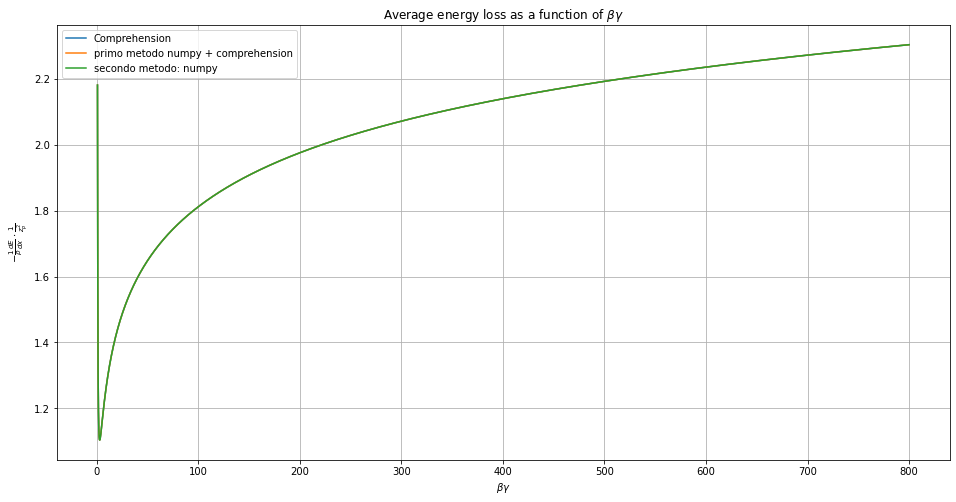

In [ ]:
# Grafiche per comparare numericamente i vari metodi

%matplotlib inline
plt.figure(figsize=(16,8))
plt.plot(x, BB, label = "Comprehension")
plt.plot(x, BBnc, label = "primo metodo numpy + comprehension")
plt.plot(x, BBn, label = "secondo metodo: numpy")
plt.title(r'Average energy loss as a function of $\beta\gamma$')
plt.xlabel(r'$\beta\gamma$')
plt.ylabel(r'$-\frac{1}{\rho} \frac{dE}{dx}\cdot \frac{1}{z_p^2}$')
plt.grid()
plt.legend()
plt.show()